# Symptoms based Disease Prediction using Machine Learning

This notebook looks into using various Python-based Machine Learning and Data Science libraries in an attempt to build a Machine Learning model capable of predicting the Diseased based on their Symptoms.

We're going to follow the following approach.
1. Problem Identification
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Identification

In a statement, 
> Given symptoms of a patient, can we predict his disease?

## 2. Data
The data came from Kaggle https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

## 3. Evaluation
If we can reach 93% accuracy at predicting the Disease of the patient during the proof of concept, we'll pursue the project.

## 4. Features
Symptoms of different disease are present in seperate columns and these will be our features.

* Symptom_1
* Symptom_2
* Symptom_3
* Symptom_4
* Symptom_5
* Symptom_6
* Symptom_7
* Symptom_8
* Symptom_9
* Symptom_10
* Symptom_11
* Symptom_12
* Symptom_13
* Symptom_14
* Symptom_15
* Symptom_16
* Symptom_17


# Preparing the tools
We're going to use Pandas, Matplotlib and NumPy for Data Analysis and Manipulation.

In [6]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside our notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve

# Importing the Dataset

In [7]:
df = pd.read_csv("dataset.csv")
df.shape

(4920, 18)

# Data Exploration (Exploratory Data Analysis)

1. What question(s) are you trying to ask?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the Outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?



In [8]:

df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4910,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,depression,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN
4911,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
4912,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
4913,Osteoarthristis,joint_pain,neck_pain,knee_pain,hip_joint_pain,swelling_joints,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4914,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

<Axes: xlabel='Disease'>

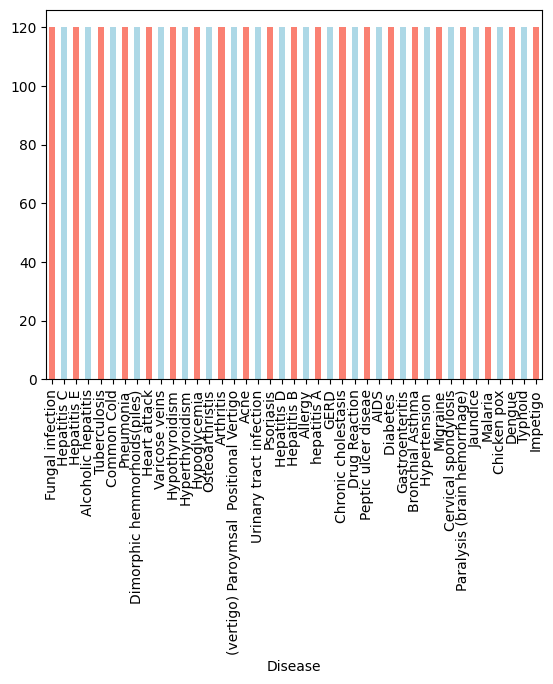

In [11]:
df['Disease'].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [13]:
df.tail(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Finding out how many unique values each column has.
count = 0
for i in df.columns:
    print(i, ": ", len(df[i].unique()))

Disease :  41
Symptom_1 :  34
Symptom_2 :  48
Symptom_3 :  54
Symptom_4 :  51
Symptom_5 :  39
Symptom_6 :  33
Symptom_7 :  27
Symptom_8 :  22
Symptom_9 :  23
Symptom_10 :  22
Symptom_11 :  19
Symptom_12 :  12
Symptom_13 :  9
Symptom_14 :  5
Symptom_15 :  4
Symptom_16 :  4
Symptom_17 :  2


# Split the data into Features 'X' and Labels 'y'

In [15]:

X = df.drop("Disease", axis = 1)
y = df["Disease"]

# Encoding the data

In [16]:

cat_columns = X.select_dtypes(['object']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: pd.factorize(x)[0])
X.head(15)

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [17]:
result = pd.concat([y,X], axis =1, join='inner')
result.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Fungal infection,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Fungal infection,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Fungal infection,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Fungal infection,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


# Spliting the data into train and test set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 17), (984, 17), (3936,), (984,))

# Instantiate the model to try

In [19]:
clf = KNeighborsClassifier()

# Fit the model to the data

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

# Score the model

In [21]:
clf.score(X_test, y_test)

1.0

# Making Predictions using a Machine Learning Model

2 ways to make predictions:
1. 'predict()'
2. 'prdict_proba()'

In [22]:
# Predictions of the model
clf.predict(X_test)

array(['GERD', 'Allergy', 'Urinary tract infection',
       'Peptic ulcer diseae', 'Dengue', 'hepatitis A', 'Tuberculosis',
       'Fungal infection', 'Hypertension ', 'Hepatitis B', 'Pneumonia',
       'Paralysis (brain hemorrhage)', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Gastroenteritis',
       'Chicken pox', 'hepatitis A', 'Jaundice', 'Fungal infection',
       'Chicken pox', 'Hypoglycemia', 'Alcoholic hepatitis',
       'Varicose veins', 'Heart attack', 'Gastroenteritis', 'Impetigo',
       'Typhoid', 'Chicken pox', 'Typhoid', 'Hepatitis E',
       'Cervical spondylosis', 'Hypoglycemia', 'Hypoglycemia',
       'Hepatitis B', 'Malaria', 'Diabetes ', 'Diabetes ', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis',
       'Chronic cholestasis', 'Peptic ulcer diseae', 'Arthritis',
       'Arthritis', 'Heart attack', 'Pneumonia', 'Alcoholic hepatitis',
       'Hepatitis D', 'Urinary tract infection', 'Acne', 'Heart attack',
       

In [23]:
# Actual Predictors
np.array(y_test)

array(['GERD', 'Allergy', 'Urinary tract infection',
       'Peptic ulcer diseae', 'Dengue', 'hepatitis A', 'Tuberculosis',
       'Fungal infection', 'Hypertension ', 'Hepatitis B', 'Pneumonia',
       'Paralysis (brain hemorrhage)', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Gastroenteritis',
       'Chicken pox', 'hepatitis A', 'Jaundice', 'Fungal infection',
       'Chicken pox', 'Hypoglycemia', 'Alcoholic hepatitis',
       'Varicose veins', 'Heart attack', 'Gastroenteritis', 'Impetigo',
       'Typhoid', 'Chicken pox', 'Typhoid', 'Hepatitis E',
       'Cervical spondylosis', 'Hypoglycemia', 'Hypoglycemia',
       'Hepatitis B', 'Malaria', 'Diabetes ', 'Diabetes ', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis',
       'Chronic cholestasis', 'Peptic ulcer diseae', 'Arthritis',
       'Arthritis', 'Heart attack', 'Pneumonia', 'Alcoholic hepatitis',
       'Hepatitis D', 'Urinary tract infection', 'Acne', 'Heart attack',
       

# Compare predictions to the truth labels to evaluate the model

In [24]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

1.0

In [25]:
clf.score(X_test, y_test)

1.0

In [26]:
accuracy_score(y_preds, y_test)

1.0

In [27]:
clf.predict_proba(X_test[:5])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
clf.predict(X_test[:5])

array(['GERD', 'Allergy', 'Urinary tract infection',
       'Peptic ulcer diseae', 'Dengue'], dtype=object)

 # Evaluating our model By using Cross Validation

It simply means our model will be trained and tested on 5 diffrent versions of our data.

In [30]:
cross_val_score(clf, X, y, cv= 5)

array([1., 1., 1., 1., 1.])

### Classification Model Evaluation Metrics

* Accuracy
* Area under ROC curve
* Confusion Matrix
* Classification report

## Accuracy

In [31]:
cross_val_score = cross_val_score(clf, X, y, cv=5)
np.mean(cross_val_score)

1.0

In [32]:
print(f"Disease Prediction Cross Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Disease Prediction Cross Validated Accuracy: 100.00%


## ROC curve works only for Binary Classification

## Confusion Matrix

<Axes: >

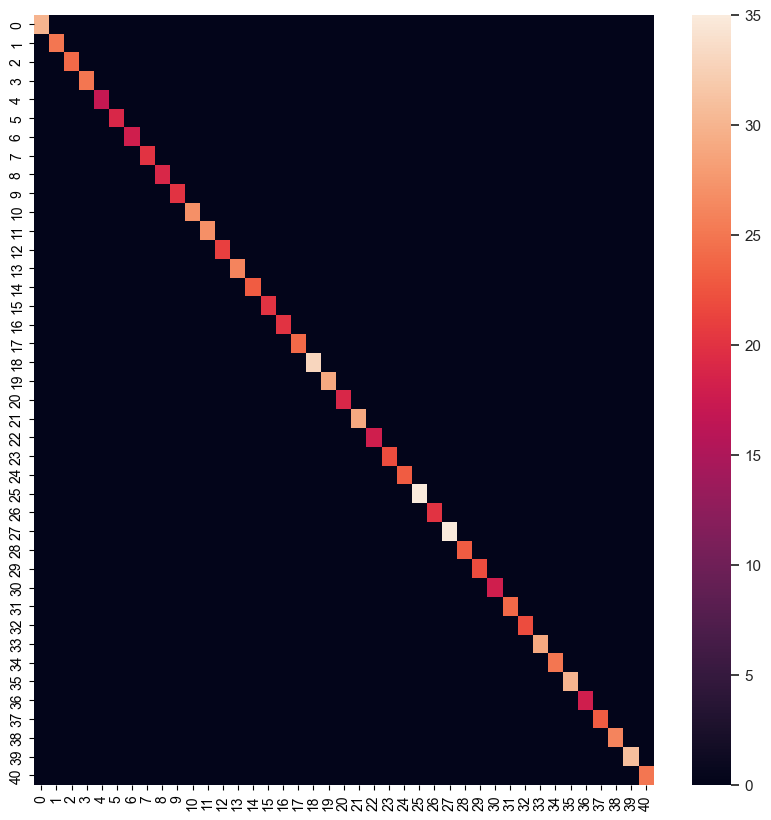

In [33]:
conf_mat = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(conf_mat, ax=ax)

In [34]:
# Visualize confusion matrix using pd.crosstab

pd.crosstab(y_test, y_preds,rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
Actual Labels,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,0,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken pox,0,0,0,0,0,0,0,0,19,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
disease = np.max(clf.predict(X_test[:5]))
disease


'Urinary tract infection'

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
cv = CountVectorizer(max_features=93)


def Convert(string):
    li = list(string.split(","))
    return li


def Convert_to_list(string):
    strr = str(string)
    li = list(strr.split(","))
    return li

In [39]:
doctors = pd.read_csv("final_doc_data2.csv")
doctors['Disease-treated'] = doctors['Disease-treated'].apply(Convert)
doctors["City"] = doctors["City"].apply(Convert_to_list)
doctors["Specialization"] = doctors["Specialization"].apply(Convert_to_list)
doctors["Cost"] = doctors["Cost"].apply(Convert_to_list)
doctors['Tags'] = + doctors['Specialization'] + doctors['Disease-treated'] + doctors['City'] + doctors['Cost']

new_df2 = doctors[['Doctor id', 'Doctor Name', 'Specialization', 'Disease-treated', 'City', 'Cost', 'Tags']]
new_df2['Tags'] = new_df2['Tags'].apply(lambda x: " ".join(x))
new_df2['Tags'] = new_df2['Tags'].apply(lambda x: x.lower())

vectors = cv.fit_transform(new_df2['Tags']).toarray()

similarity = cosine_similarity(vectors)

C:\Users\hzmal\AppData\Local\Temp\ipykernel_9224\2579708232.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Tags'] = new_df2['Tags'].apply(lambda x: " ".join(x))
C:\Users\hzmal\AppData\Local\Temp\ipykernel_9224\2579708232.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Tags'] = new_df2['Tags'].apply(lambda x: x.lower())


In [40]:
def recommend_doctor(disease):
    i = 0
    found = False
    for row in new_df2['Disease-treated']:
        if disease in row:
            found = True
            break
        i += 1
    if not found:
        return []
    distances = similarity[new_df2.index[i]]
    doctor_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    res = [new_df2.iloc[i[0]].to_dict() for i in doctor_list]
    for i in doctor_list:
        print(new_df2.iloc[i[0]][1])
    return res

In [41]:
print(recommend_doctor(disease))
# OR 
# print(recommend_doctor(input("Enter disease name: ")))


dr-muhammad-waqas-khan
dr-muhammad-mansoor
dr-junaid-riaz
dr-qaisar-ansari
dr-nasim-abbas-hashmi
[{'Doctor id': 273, 'Doctor Name': 'dr-muhammad-waqas-khan', 'Specialization': ['urologist'], 'Disease-treated': ['Urinary tract infection'], 'City': ['multan'], 'Cost': ['500'], 'Tags': 'urologist urinary tract infection multan 500'}, {'Doctor id': 272, 'Doctor Name': 'dr-muhammad-mansoor', 'Specialization': ['urologist'], 'Disease-treated': ['Urinary tract infection'], 'City': ['karachi'], 'Cost': ['500'], 'Tags': 'urologist urinary tract infection karachi 500'}, {'Doctor id': 35, 'Doctor Name': 'dr-junaid-riaz', 'Specialization': ['dermatologist'], 'Disease-treated': ['Acne', ' Fungal Infection', ' Allergy', ' Impetigo', ' Varicose veins'], 'City': ['multan'], 'Cost': ['1000'], 'Tags': 'dermatologist acne  fungal infection  allergy  impetigo  varicose veins multan 1000'}, {'Doctor id': 45, 'Doctor Name': 'dr-qaisar-ansari', 'Specialization': ['dermatologist'], 'Disease-treated': ['Acne',